Ερώτημα 1
=========

In [65]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/winequality-red.csv")
print("Diastaseis {}".format(df.shape))
df.head()

Diastaseis (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
col_names = df.columns
col_num = df.shape[1]
x = df.loc[:, df.columns[0:11]].to_numpy()
y = df.loc[:, df.columns[11]].to_numpy()

### Κανονικοποίηση δεδομένων

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

### Διαχωρισμός δεδομένων
Θέλουμε να διαχωρίσουμε τα δεδομένα σε 2 υποσυνολα: training και test. Όμως πρέπει να προσέξουμε τα δυο σύνολα να έχουν ίδια κατανομή, γιατί απ'οτι φαίνεται και στο παρκάτω διάγραμμα το πλήθος των δεδομένων της κατηγορίας quality=3 ή 4 είναι πολύ λιγότερα από αυτά των κατηγοριών 5 και 6.

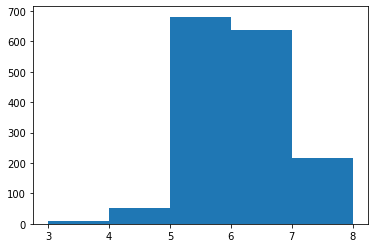

In [68]:
from matplotlib import pyplot as plt
import numpy as np

categories = np.unique(y)
fig,ax = plt.subplots(1,1)
ax.hist(y, bins=categories)
plt.show()

In [69]:
category_indices = []
for category in categories:
    category_indices.append([i for i in range(len(y)) if y[i]==category ])

x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(category_indices)):
    cat_num = len(category_indices[i])
    for j in range(0, int(0.75*cat_num)):
        k = category_indices[i][j]
        x_train.append(x_normalized[k,:])
        y_train.append(y[k])
    for j in range(int(0.75*cat_num), cat_num):
        k = category_indices[i][j]
        x_test.append(x_normalized[k,:])
        y_test.append(y[k])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


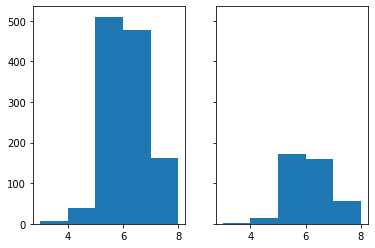

In [70]:
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(y_train, bins=categories)
axs[1].hist(y_test, bins=categories)
plt.show()

### Support Vector Machine

In [71]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=10000)
clf.fit(x_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
y_predicted = clf.predict(x_test)
(y_predicted==y_test).sum()/len(y_test)

0.5235732009925558

### F1 Score

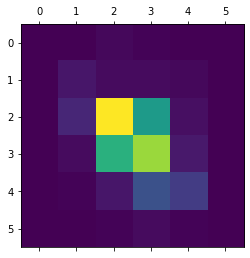

precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.29      0.43      0.34        14
           5       0.57      0.59      0.58       171
           6       0.50      0.54      0.52       160
           7       0.56      0.36      0.44        50
           8       0.00      0.00      0.00         5

    accuracy                           0.52       403
   macro avg       0.32      0.32      0.31       403
weighted avg       0.52      0.52      0.52       403



In [73]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(y_test, y_predicted))
plt.show()
print(classification_report(y_test, y_predicted))

### Βελτίωση Support Vector Machine


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size = 0.25)

svclassifier = svm.SVC(kernel='rbf', C=100000, gamma=0.05)
svclassifier.fit(X_train, y_train)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

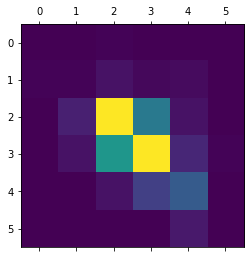

precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.08      0.07        12
           5       0.61      0.65      0.63       156
           6       0.62      0.59      0.60       171
           7       0.53      0.55      0.54        53
           8       0.00      0.00      0.00         7

    accuracy                           0.58       400
   macro avg       0.30      0.31      0.31       400
weighted avg       0.58      0.58      0.58       400



In [82]:
y_pred = svclassifier.predict(X_test)
plt.matshow(confusion_matrix(y_test, y_pred))
plt.show()
print(classification_report(y_test, y_pred))

In [76]:
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

# C_range = np.logspace(-2, 10, 2)
# gamma_range = np.logspace(-9, 3, 3)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
# grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=-1)
# grid.fit(x, y)

# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))